<a href="https://colab.research.google.com/github/S1RJAM3S/TaxiFaresPRJ/blob/master/TaxiFaresModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#IMPORT
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [4]:
#data
df = pd.read_csv('TripData.csv')
print(df.head(5))

                          medallion                      hack_license  \
0  89D227B655E5C82AECF13C3F540D4CF4  BA96DE419E711691B9445D6A6307C170   
1  0BD7C8F5BA12B88E0B67BED28BEA73D8  9FD8F69F0804BDB5549F40E9DA1BE472   
2  0BD7C8F5BA12B88E0B67BED28BEA73D8  9FD8F69F0804BDB5549F40E9DA1BE472   
3  DFD2202EE08F7A8DC9A57B02ACB81FE2  51EE87E3205C985EF8431D850C786310   
4  DFD2202EE08F7A8DC9A57B02ACB81FE2  51EE87E3205C985EF8431D850C786310   

  vendor_id  rate_code pickup_datetime dropoff_datetime  passenger_count  \
0       CMT          1  1/1/2013 15:11   1/1/2013 15:18                4   
1       CMT          1   1/6/2013 0:18    1/6/2013 0:22                1   
2       CMT          1  1/5/2013 18:49   1/5/2013 18:54                1   
3       CMT          1  1/7/2013 23:54   1/7/2013 23:58                2   
4       CMT          1  1/7/2013 23:25   1/7/2013 23:34                1   

   trip_time_in_secs  trip_distance  pickup_longitude  ...  dropoff_longitude  \
0                382   

In [5]:
#delete col "medallion" & "hack_license"
df = df.drop(['medallion', 'hack_license'], axis= 1)

In [6]:
# CHECK SPECIAL CASE

#check null
df.dropna(inplace= True)

#check and drop duplicates
df.drop_duplicates(inplace= True)
print(len(df))

#check missing value
print(df.isnull().sum())

#check passenger_count >= 1 && fare_amount > 0
df = df[df['passenger_count'] >= 1]
df = df[df[' fare_amount'] > 0]
print(len(df))

50129
vendor_id            0
rate_code            0
pickup_datetime      0
dropoff_datetime     0
passenger_count      0
trip_time_in_secs    0
trip_distance        0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
 vendor_id           0
 payment_type        0
 fare_amount         0
 surcharge           0
 mta_tax             0
 tip_amount          0
 tolls_amount        0
 total_amount        0
dtype: int64
50128


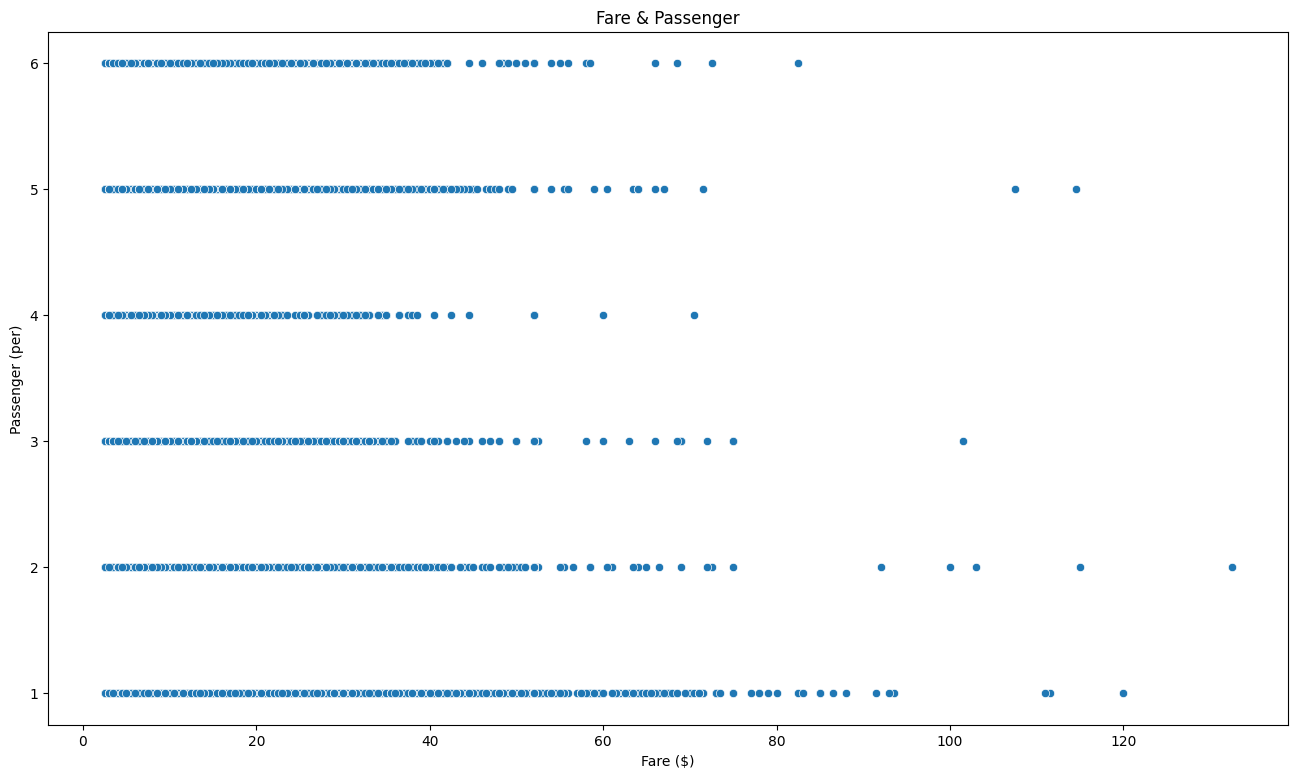

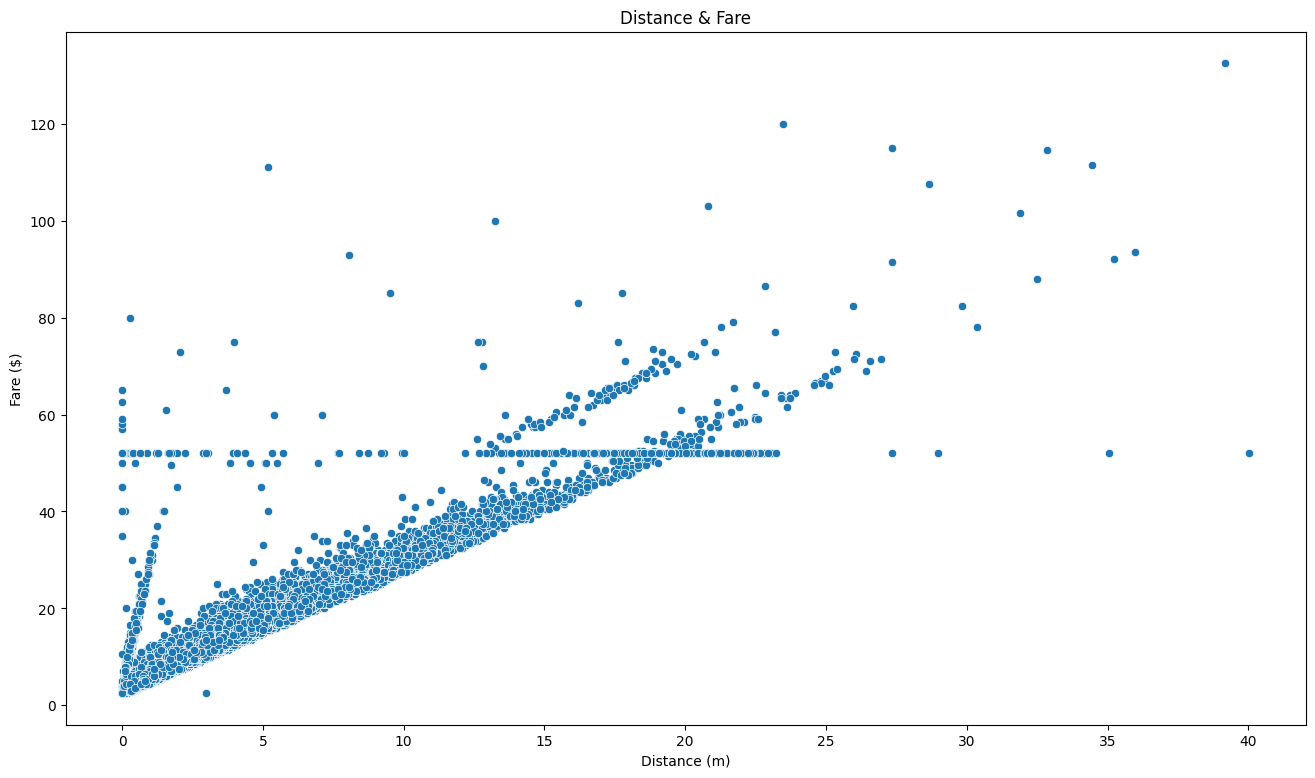

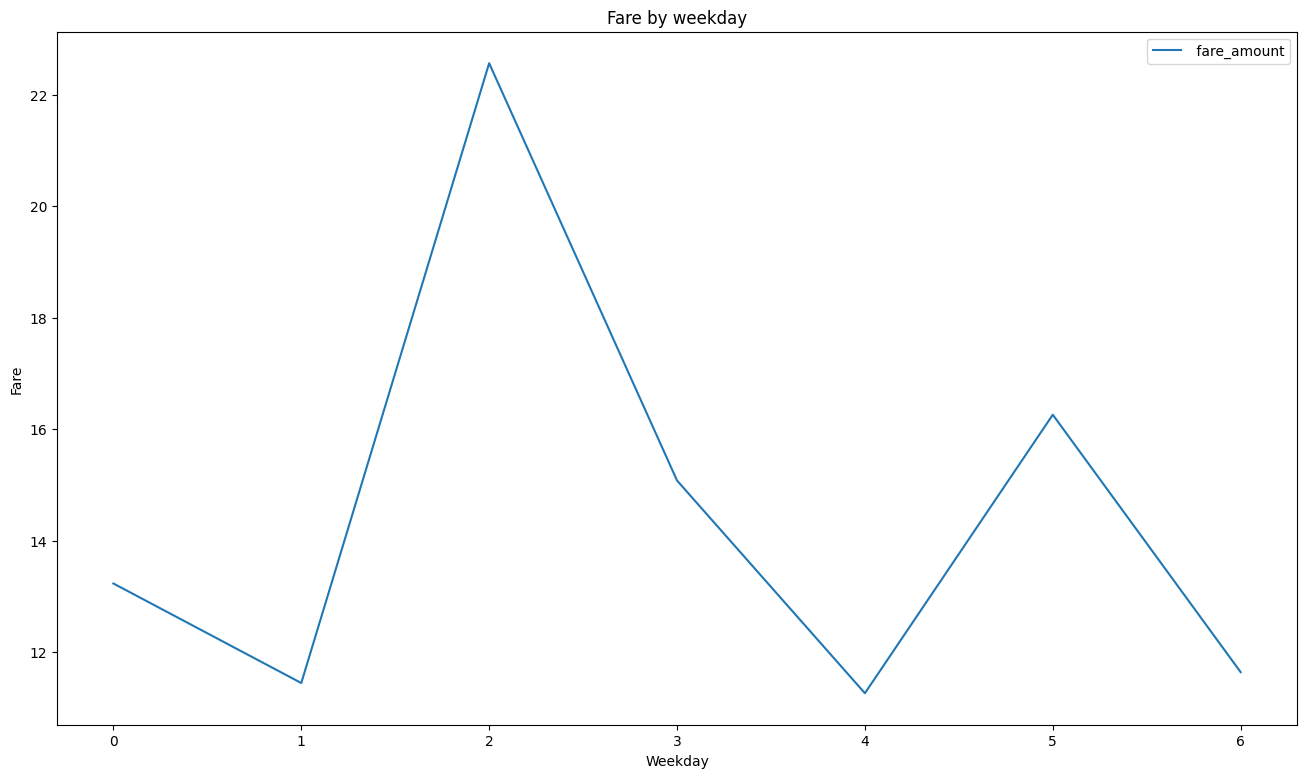

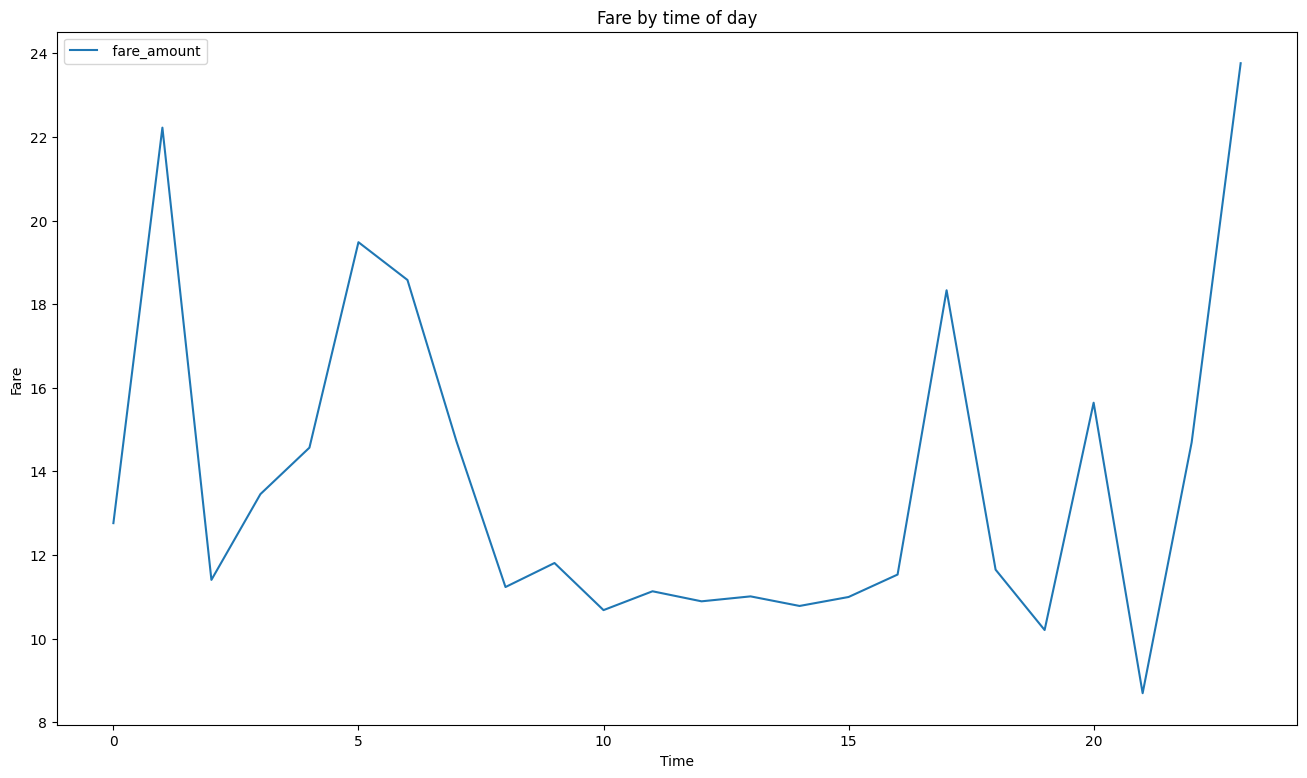

In [7]:
# COMPARE

# 1. compare: fare_amount - passenger_count

fig = plt.figure(figsize = (16, 9))
sns.scatterplot(x= ' fare_amount', y= 'passenger_count', data= df).set_title('Fare & Passenger')
plt.xlabel('Fare ($)')
plt.ylabel('Passenger (per)')
plt.show()

# --> no rela

# 2. compare: fare_amount - trip_distance

fig = plt.figure(figsize = (16, 9))
sns.scatterplot(x= 'trip_distance', y= ' fare_amount', data= df).set_title('Distance & Fare')
plt.xlabel('Distance (m)')
plt.ylabel('Fare ($)')
plt.show()

# --> maybe

# 3. convert time (in the same year?)
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['weekday'] = df['pickup_datetime'].dt.dayofweek
df['time'] = df['pickup_datetime'].dt.hour

# 3.1. compare: fare - weekdays

df.pivot_table(' fare_amount', index= 'weekday').plot(figsize= (16,9))
plt.title('Fare by weekday')
plt.xlabel('Weekday')
plt.ylabel('Fare')
plt.show()

# --> Peak at Wednesday, Saturday

# 3.2. compare: fare - hours

df.pivot_table(' fare_amount', index= 'time').plot(figsize= (16,9))
plt.title('Fare by time of day')
plt.xlabel('Time')
plt.ylabel('Fare')
plt.show()

# --> Peak at 1h, 5h, 17h, 20h, 24h

In [8]:
# TRAIN & TEST DATA

# Split data
x_fare = df[['weekday', 'time', 'trip_distance']]
y_fare = df[' fare_amount'].values
x_train, x_test, y_train, y_test = train_test_split(x_fare, y_fare, test_size= 0.3, random_state= 69)

reg = LinearRegression()
reg.fit(x_train, y_train)

y_pred = reg.predict(x_test)

print('score: %.4f' %(reg.score(x_test, y_test)))


score: 0.9350
